In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [2]:
# for sentimental anaylsis condiser the csv file and the poisitve and negative txt files
df=pd.read_csv("Elon_musk.csv")
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
# remove the unnamed column
df.drop ("Unnamed: 0",axis=1,inplace=True)
df.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
# lets rename the text as tweets 
df.rename(columns={'Text':'tweets'},inplace=True)
df

,tweets
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
#pip install  -U textblob

In [5]:
import textblob

In [6]:
from textblob import TextBlob

In [7]:
# lets clean the data and remove the punctutions and specail charcters
import string
def clean_tweets(tweets):
    " make the text lower case,remove the text in squarebrackets,remove the text in punctuations,and special characters"
    tweets=tweets.lower()
    tweets=re.sub('\[.*?\]','',tweets)
    tweets=re.sub('[%s]'%re.escape(string.punctuation),'',tweets)
    tweets=re.sub('\w*\d\w*','',tweets)
    tweets = re.sub("[0-9" "]+"," ",tweets)
    tweets = re.sub('[‘’“”…]', '', tweets)
    tweets=re.sub('https:\ $',' ',tweets)
    tweets=re.sub(" _'_ ",' ',tweets)
    return(tweets)

clean=lambda x : clean_tweets(x)

In [8]:
# the tweets clean the the dataframe
df['tweets']=df.tweets.apply(clean)
df.tweets

0                                            i�m an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: tweets, Length: 1999, dtype: object

In [9]:
# lets check for the word freuquecy
w_frq=pd.Series(" ".join(df['tweets']).split()).value_counts()[:20]
w_frq

the               483
to                396
is                349
a                 348
of                309
spacex            237
amp               216
in                213
for               190
tesla             166
will              164
be                156
erdayastronaut    142
this              139
it                136
we                135
on                128
that              127
rt                127
but               124
dtype: int64

In [10]:
# lets remove the stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['tweets']=df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x  not in stop))

In [11]:
# word frequnecy after removing the stopwrods
word_frq2=pd.Series(" ".join(df['tweets']).split()).value_counts()[:20]
word_frq2

spacex             237
amp                216
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
�                   77
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
haha                55
nasaspaceflight     55
it�s                54
good                51
launch              48
sure                43
yeah                41
dtype: int64

In [12]:
# Get The Subjectivity
def sentiment_analysis(df):
    sentiment = TextBlob(df["tweets"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,tweets,subjectivity,polarity
0,i�m alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb dumber,0.500000,-0.375000


In [13]:
# lest do the analysis of the values obtained
#def analysis(values):
#analysis=[]
#for values in df['polarity']:
#    if values < 0:
    #    analysis.append("NEGATIVE")
   # elif values==0:
   #        analysis.append("NEUTRAL")
  #  else:
 #       analysis.append ("POISTIVE")
        #f_c["tax_range"]=pd.Series(data=tax_range)
#print(df)
#df['analysis']= pd.Series(analysis) 




def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    

df["analysis"] = df["polarity"].apply(analysis)

df
    

,tweets,subjectivity,polarity,analysis
0,i�m alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1997,ppathole altho dumb dumber,0.500000,-0.375000,Negative


In [14]:

df

,tweets,subjectivity,polarity,analysis
0,i�m alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1997,ppathole altho dumb dumber,0.500000,-0.375000,Negative


In [15]:
#lets check for the positve tweets

positive_tweets = df[df['analysis'] == 'Positive']
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['tweets'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely


In [16]:
# lest check for the neagtive tweets
negative_tweets = df[df['analysis'] == 'Negative']

print('negative tweets')
for i ,row in negative_tweets[:15].iterrows():
    print ('-'+ row['tweets'])


negative tweets
-i�m alien
-frodo underdoge thought would fail httpstcozgxjfdzzrm
-freewalletorg app sucks
-rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however don�
-rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year or�
-sruhle everyone tesla receives stock comp stockoptions take table that�s you�re missing
-madoverlord dumb
-tough one
-rt spacex mission enables access everyday people dream going space
-engineersfeed earth small amp smaller still
-teslaownerssv dmcryan little
-wholemarsblog drive without using prnd stalkstick days gets annoying go back amp use shifter
-wholemarsblog stalks car guesses drive direction based obstacles sees context amp nav map you�
-flcnhvy wholemarsblog yes although crazy turn fsd
-naval also road hell mostly paved bad intentions


In [17]:
# lets use count vectorzier to check the frequency of the words
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vect=CountVectorizer(min_df=1,max_df=0.8)
X=vect.fit_transform(df['tweets'])
w_f_df=pd.DataFrame({'term':vect.get_feature_names_out(),'occurances':np.asarray(X.sum(axis=0)).ravel().tolist()})
w_f_df['frequencies']=w_f_df['occurances']/np.sum(w_f_df['occurances'])

In [18]:
w_f_df.head()

,term,occurances,frequencies
0,aber,1,0.000074
1,able,6,0.000446
2,abo,1,0.000074
3,aboard,1,0.000074
4,abort,3,0.000223


In [19]:
# lets arrange it in ascending order
w_f_df.sort_values(by='occurances',ascending=True)

,term,occurances,frequencies
0,aber,1,0.000074
2538,monopolies,1,0.000074
2539,monopolist,1,0.000074
2542,monty,1,0.000074
2544,moonlamboio,1,0.000074
...,...,...,...
3328,rt,127,0.009444
1219,erdayastronaut,142,0.010559
3900,tesla,167,0.012418
149,amp,218,0.016211


In [20]:
# lets perform TFIDF method
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tdf=TfidfVectorizer(max_features=1000,max_df=0.5,stop_words='english',smooth_idf=True)# consider 1000 words
doc_vec=vect_tdf.fit_transform(df["tweets"])
naming_features=vect_tdf.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
df_1=pd.DataFrame(denselist,columns=naming_features)

In [21]:
df_1.head()

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0


N-GRAMS

In [22]:
def get_top2_wrds(corpus,n=None):
    vec_bigrams=CountVectorizer(max_features=2000,ngram_range=(2,2)).fit(corpus) # for bigrams n=2
    bag_of_words=vec_bigrams.transform(corpus)
    sum_of_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_of_words[0,idx]) for word ,idx in vec_bigrams.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x :x[1],reverse=True)
    return word_freq[:n]

In [23]:
top2_word=get_top2_wrds(df['tweets'],n=200)
top2_df=pd.DataFrame(top2_word)
top2_df.columns=['Bigram','freq']
top2_df.head()

,Bigram,freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week')]

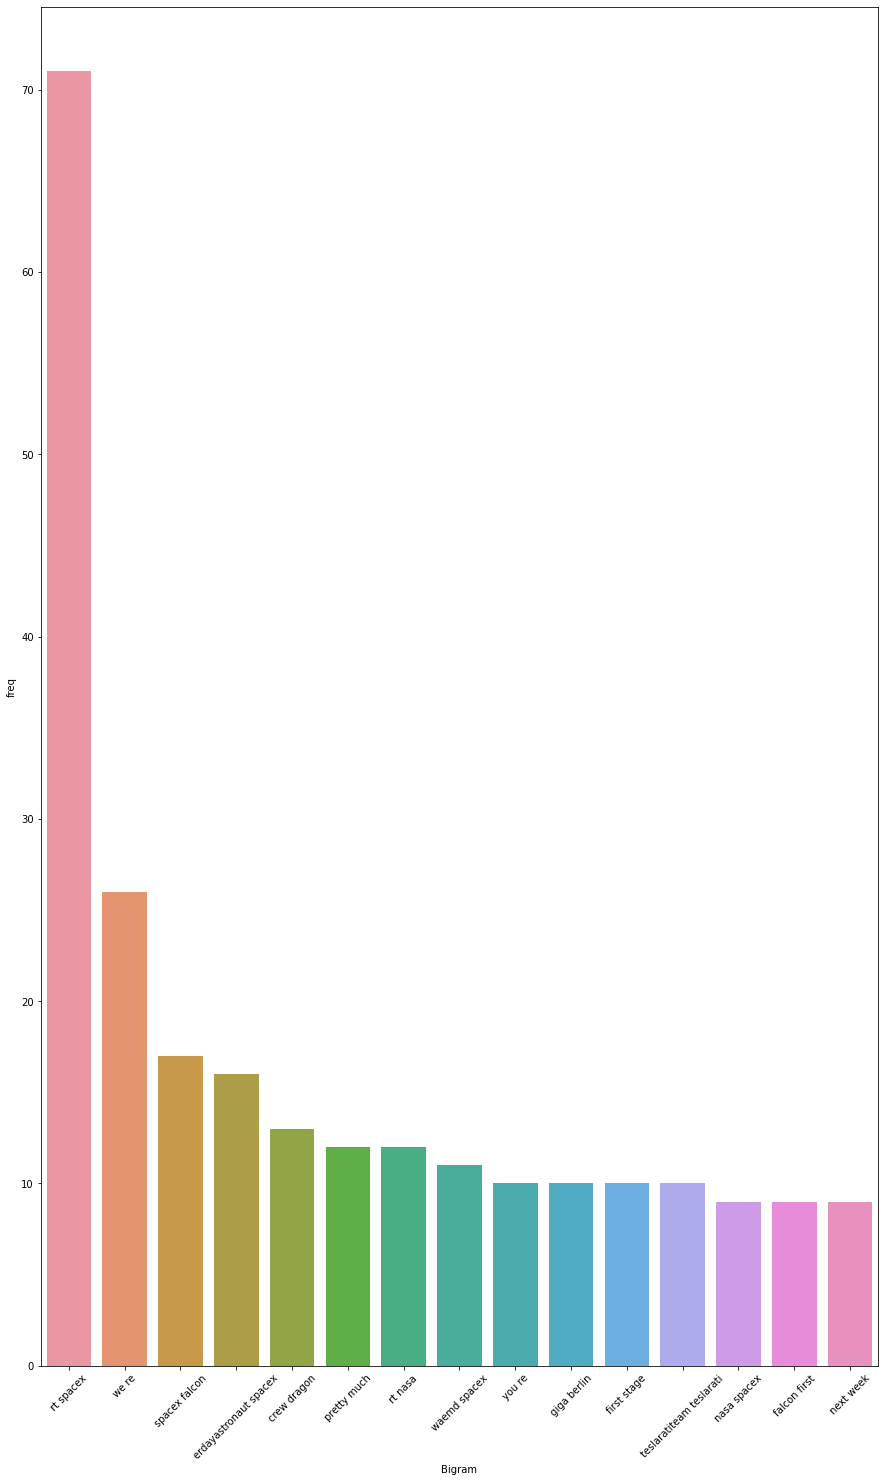

In [24]:
# lets plot the Bigram
import matplotlib.pyplot as plt
import seaborn as sns
top15_bigram=top2_df.iloc[0:15,:]
fig=plt.figure(figsize=(15,25))
plot=sns.barplot(x=top15_bigram['Bigram'],y=top15_bigram['freq'])
plot.set_xticklabels(rotation=45,labels = top15_bigram["Bigram"])

In [25]:
# let do for trigrams
def get_top3_words(corpus,n=None):
    vect_n3=CountVectorizer(max_features=2000,ngram_range=(3,3)).fit(corpus)   # for tri grams n=3
    bag_of_wrd3=vect_n3.transform(corpus)
    sum_of_wrd3=bag_of_wrd3.sum(axis=0)
    word_freq3=[(word,sum_of_wrd3[0,idx]) for word,idx in vect_n3.vocabulary_.items()]
    word_freq3=sorted(word_freq3 , key=lambda x: x[1],reverse=True)
    return(word_freq3[:n])

In [26]:
top3_wrds=get_top3_words(df['tweets'],n=200)
top3_df=pd.DataFrame(top3_wrds)
top3_df.columns=['trigram3','freq3']
top3_df.head()

,trigram3,freq3
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

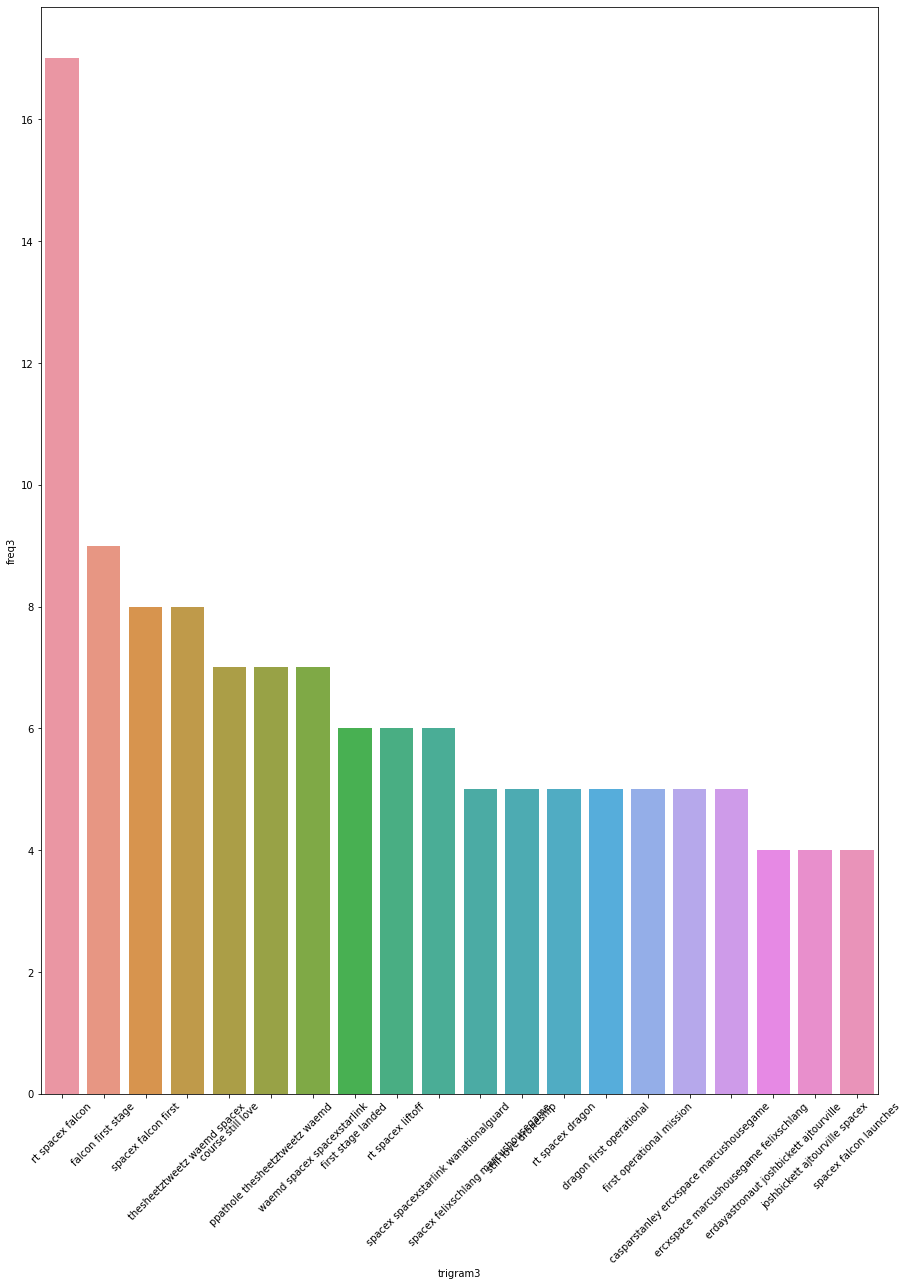

In [27]:
# lets plot the trigram
import matplotlib.pyplot as plt
import seaborn as sns
top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(15,20))
plot=sns.barplot(x=top20_trigram['trigram3'],y=top20_trigram['freq3'])
plot.set_xticklabels(rotation=45,labels=top20_trigram['trigram3'])

 WORDCLOUD

In [28]:
string=" ".join(df['tweets'])

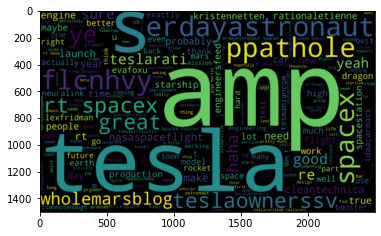

In [29]:
# lets build the wordcloud for the entire corpus
from wordcloud import WordCloud
wordcloud=WordCloud(
                    background_color='Black',
                     width=2500,height=1500).generate(string)
plt.imshow(wordcloud,interpolation="bilinear")

In [30]:
len(positive_tweets)/len(negative_tweets)

4.290816326530612

In [31]:
# lest do the sentieatal analaysis
affin=pd.read_csv("Afinn.csv.xls")
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [32]:
aff_scores=affin.set_index('word')['value'].to_dict()
aff_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = aff_scores

def calculate_sentiment(tweet: str = None) -> float:
    sent_score = 0
    if tweet:
        Text = nlp(tweet)
        for word in Text :
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [34]:
df['sentiment_value'] = df['tweets'].apply(calculate_sentiment)

In [35]:
# how many words are theer in an text
df['word_count'] = df['tweets'].str.split().apply(len)
df['word_count'].head(10)

0     2
1     7
2     4
3     2
4    10
5     4
6     6
7     4
8     8
9     3
Name: word_count, dtype: int64

In [36]:
df.sort_values(by='sentiment_value').tail(10)

,tweets,subjectivity,polarity,analysis,sentiment_value,word_count
1608,teslarati aiming make super fun,0.433333,0.316667,Positive,7,5
1966,nichegamer didn�t mind awesome mass effect tal...,0.950000,0.800000,Positive,8,9
514,spacestation spacex wow station looks amazing,0.950000,0.350000,Positive,8,6
1786,flcnhvy yourfavgas ajtourville really want gre...,0.383333,0.433333,Positive,8,10
458,teslaownerssv get absurdly good tesla aiautopi...,0.783333,0.833333,Positive,10,12
1357,great trip germany support government amp peop...,0.505556,0.444444,Positive,10,9
1172,thanks tesla team great work deliveries new ow...,0.517803,0.367424,Positive,10,15
468,picotjohn cyberpunkgame it�s good great game i...,0.562500,0.150000,Positive,10,15
1304,one way another excitement guaranteed support ...,0.300000,0.350000,Positive,11,13
1388,gerberkawasaki wow super loved astronomy took ...,0.793333,0.326667,Positive,12,12


In [37]:
df

,tweets,subjectivity,polarity,analysis,sentiment_value,word_count
0,i�m alien,0.750000,-0.250000,Negative,0,2
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral,0,7
2,joerogan spotify great interview,0.750000,0.800000,Positive,3,4
3,doge underestimated,0.000000,0.000000,Neutral,-1,2
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive,6,10
...,...,...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive,-3,12
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive,1,10
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral,0,4
1997,ppathole altho dumb dumber,0.500000,-0.375000,Negative,-3,4


In [38]:
# sentiment score for the whole review
df[df['sentiment_value']<=0].head()

,tweets,subjectivity,polarity,analysis,sentiment_value,word_count
0,i�m alien,0.75,-0.25,Negative,0,2
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00,0.00,Neutral,0,7
3,doge underestimated,0.00,0.00,Neutral,-1,2
6,frodo underdoge thought would fail httpstcozgx...,0.30,-0.50,Negative,-2,6
8,flcnhvy indeed tweets definitely represent rea...,0.50,0.00,Neutral,0,8


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

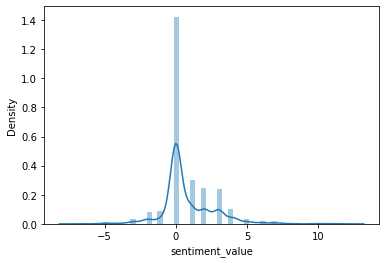

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value'])

In [40]:
df['index']=range(0,len(df))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

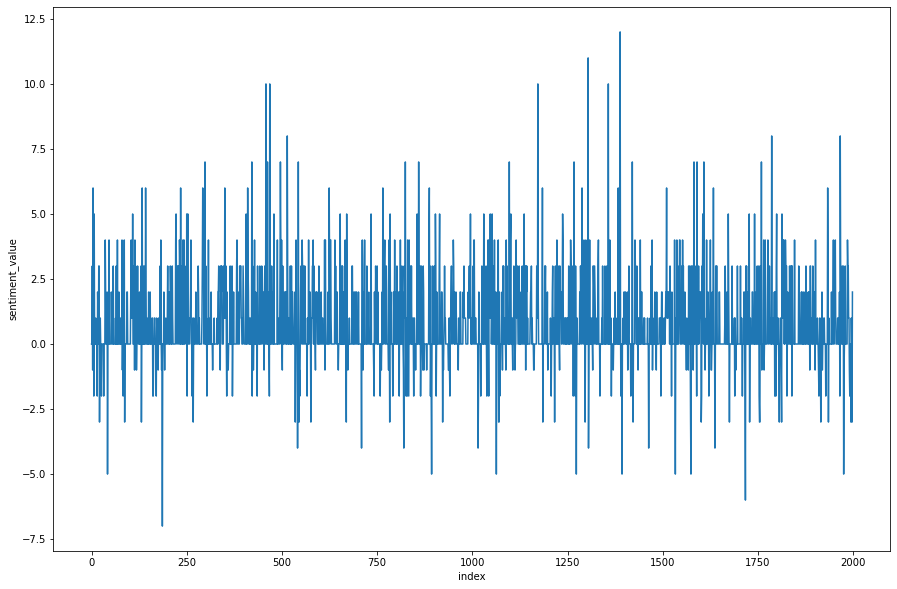

In [41]:
#plotting sentiment value for the whole data
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=df)